<a href="https://colab.research.google.com/github/YuliiaSosonna/Genesis-Analytics-Bootcamp/blob/main/Payment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('/content/drive/MyDrive/Final Task.csv')

In [377]:
# Leave 2 numbers after point for all floats
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [378]:
df_1

,#,order_id,event_time,user_id,price,payment_number,transaction_status,card_brand,card_type,bank_name,error_type,currency,card_country
0,1,c500aa10-30f8-4927-96c5-4e97b6afac83,2022-07-08 18:32:39.000000,c1ed5188-caac-4d56-bad8-bc8ee0b09960,21.00,reccurent,fail,VISA,PREPAID,ADVANCED BANK OF ASIA LIMITED,3.08,USD,KHM
1,2,624d6f30-c1bc-4778-a23e-6a227bac73ac,2022-06-09 22:18:36.000000,c9ff65b8-75e6-467f-8715-21edb5fd06af,36.00,reccurent,fail,VISA,PREPAID,UNITED BANK FOR AFRICA GHANA LIMITED,3.02,USD,GHA
2,3,4d75ca57-8883-49a9-b150-1ab7a47d12f8,2022-06-09 11:18:32.000000,1005d4fb-1b7d-4715-835f-4d2a9bfe7cbb,36.00,initial,success,VISA,CREDIT,ICICI BANK LTD,NaN,USD,IND
3,4,3fd11eed-4236-46aa-8f21-3c1e1a17a1bc,2022-06-29 13:50:47.000000,866c4b2b-0285-43aa-98bd-d60bc3a78d7c,36.00,reccurent,fail,VISA,DEBIT,THE TORONTO-DOMINION BANK,3.02,USD,CAN
4,5,3b19657f-1a34-4233-b25c-5d3b7fb32782,2022-06-17 15:16:47.000000,bd2e4137-5526-4d9b-9dde-7482087fc321,9.00,reccurent,success,MASTERCARD,CREDIT,"CAPITAL ONE BANK (USA), NATIONAL ASSOCIATION",NaN,USD,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
566408,566409,1a5a6077-bf0a-4a21-bb51-4e0a5f0ef689,2022-04-14 13:23:13.000000,6eb098dd-e479-4f02-be02-74ed1ecc0551,12.00,initial,success,VISA,DEBIT,"WELLS FARGO BANK, NATIONAL ASSOCIATION",NaN,USD,USA
566409,566410,276d6270-b665-4b72-bb90-d9d3ef1fc571,2022-04-17 16:14:47.000000,921e4a74-9407-4d84-92f7-1f58750f77c5,24.00,reccurent,success,MASTERCARD,CREDIT,COLLABRIA FINANCIAL SERVICES,NaN,USD,CAN
566410,566411,8dde4932-ec01-4ffa-88e0-f8689aaad00e,2022-01-03 08:12:47.000000,d8be2270-2337-4f5c-b695-0177bc351915,21.00,reccurent,success,VISA,DEBIT,BANK OF SCOTLAND PLC,NaN,USD,GBR
566411,566412,372312ea-3132-4999-b2da-7a8542aa8627,2022-05-01 12:47:47.000000,61819e8e-12e5-4725-bf7c-e02f8d34b3ad,9.00,reccurent,success,VISA,DEBIT,TRUIST BANK,NaN,USD,USA


In [379]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566413 entries, 0 to 566412
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   #                   566413 non-null  int64  
 1   order_id            566413 non-null  object 
 2   event_time          566413 non-null  object 
 3   user_id             566413 non-null  object 
 4   price               566413 non-null  float64
 5   payment_number      566413 non-null  object 
 6   transaction_status  566413 non-null  object 
 7   card_brand          566413 non-null  object 
 8   card_type           565643 non-null  object 
 9   bank_name           564404 non-null  object 
 10  error_type          313048 non-null  float64
 11  currency            566413 non-null  object 
 12  card_country        565886 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 56.2+ MB


In [380]:
df_1['error_type'].unique()

array([3.08, 3.02,  nan, 3.04, 5.08, 3.1 , 3.03, 4.03, 0.01, 3.01, 4.02,
       5.01, 4.01, 4.09, 2.08, 2.15, 2.06, 4.05, 3.05, 5.03, 4.04, 2.02,
       2.01, 2.14, 5.04, 2.11, 2.09, 7.01, 5.11, 0.03, 6.01, 2.1 , 2.16,
       7.07, 3.07, 7.03, 4.06, 6.02, 5.02, 0.02, 5.06, 5.07])

In [381]:
df_1[df_1['error_type'] == 3.1].head(1)

,#,order_id,event_time,user_id,price,payment_number,transaction_status,card_brand,card_type,bank_name,error_type,currency,card_country
12,13,739db433-11e4-44ad-8022-cd966bd1a732,2022-07-13 08:34:48.000000,570a8571-bf29-4340-a9ba-fb771301995d,5.00,initial,fail,VISA,DEBIT,"VARO BANK, NATIONAL ASSOCIATION",3.10,USD,USA


We have an error type 3.10, but in the raw data it appears as 3.1 because the value was stored as a float.

In [382]:
#Check missing values
df_1.isnull().sum()

,0
#,0
order_id,0
event_time,0
user_id,0
price,0
payment_number,0
transaction_status,0
card_brand,0
card_type,770
bank_name,2009


In [383]:
#Remove missing values
df = df_1.dropna(subset=['bank_name', 'card_type', 'card_country'])
df.isnull().sum()

,0
#,0
order_id,0
event_time,0
user_id,0
price,0
payment_number,0
transaction_status,0
card_brand,0
card_type,0
bank_name,0


In [384]:
#Correct date and time format
df.loc[:, 'event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

In [385]:
df

,#,order_id,event_time,user_id,price,payment_number,transaction_status,card_brand,card_type,bank_name,error_type,currency,card_country
0,1,c500aa10-30f8-4927-96c5-4e97b6afac83,2022-07-08 18:32:39,c1ed5188-caac-4d56-bad8-bc8ee0b09960,21.00,reccurent,fail,VISA,PREPAID,ADVANCED BANK OF ASIA LIMITED,3.08,USD,KHM
1,2,624d6f30-c1bc-4778-a23e-6a227bac73ac,2022-06-09 22:18:36,c9ff65b8-75e6-467f-8715-21edb5fd06af,36.00,reccurent,fail,VISA,PREPAID,UNITED BANK FOR AFRICA GHANA LIMITED,3.02,USD,GHA
2,3,4d75ca57-8883-49a9-b150-1ab7a47d12f8,2022-06-09 11:18:32,1005d4fb-1b7d-4715-835f-4d2a9bfe7cbb,36.00,initial,success,VISA,CREDIT,ICICI BANK LTD,NaN,USD,IND
3,4,3fd11eed-4236-46aa-8f21-3c1e1a17a1bc,2022-06-29 13:50:47,866c4b2b-0285-43aa-98bd-d60bc3a78d7c,36.00,reccurent,fail,VISA,DEBIT,THE TORONTO-DOMINION BANK,3.02,USD,CAN
4,5,3b19657f-1a34-4233-b25c-5d3b7fb32782,2022-06-17 15:16:47,bd2e4137-5526-4d9b-9dde-7482087fc321,9.00,reccurent,success,MASTERCARD,CREDIT,"CAPITAL ONE BANK (USA), NATIONAL ASSOCIATION",NaN,USD,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
566408,566409,1a5a6077-bf0a-4a21-bb51-4e0a5f0ef689,2022-04-14 13:23:13,6eb098dd-e479-4f02-be02-74ed1ecc0551,12.00,initial,success,VISA,DEBIT,"WELLS FARGO BANK, NATIONAL ASSOCIATION",NaN,USD,USA
566409,566410,276d6270-b665-4b72-bb90-d9d3ef1fc571,2022-04-17 16:14:47,921e4a74-9407-4d84-92f7-1f58750f77c5,24.00,reccurent,success,MASTERCARD,CREDIT,COLLABRIA FINANCIAL SERVICES,NaN,USD,CAN
566410,566411,8dde4932-ec01-4ffa-88e0-f8689aaad00e,2022-01-03 08:12:47,d8be2270-2337-4f5c-b695-0177bc351915,21.00,reccurent,success,VISA,DEBIT,BANK OF SCOTLAND PLC,NaN,USD,GBR
566411,566412,372312ea-3132-4999-b2da-7a8542aa8627,2022-05-01 12:47:47,61819e8e-12e5-4725-bf7c-e02f8d34b3ad,9.00,reccurent,success,VISA,DEBIT,TRUIST BANK,NaN,USD,USA


In [386]:
#Count unique rows
df.nunique()

,0
#,563810
order_id,562715
event_time,480193
user_id,114099
price,42
payment_number,2
transaction_status,2
card_brand,15
card_type,6
bank_name,4602


In [387]:
#How many duplicates 'order_id' are there?
dupes = df[df.duplicated('order_id', keep=False)]

dupe_stats = dupes.groupby('transaction_status').agg(
    unique_orders=('order_id', 'nunique'),
    duplicate_rows=('order_id', 'count')
)

dupe_stats

,unique_orders,duplicate_rows
transaction_status,,
fail,27,54
success,1068,2136


In [388]:
#Look at what the duplicates look like
df[df.duplicated('order_id', keep=False)].sort_values('order_id')

,#,order_id,event_time,user_id,price,payment_number,transaction_status,card_brand,card_type,bank_name,error_type,currency,card_country
28834,28835,005b0d57-4270-4e8a-8476-d71bbf4448bd,2022-12-09 16:57:50,7cd492f9-dda6-4fa9-9d28-00784258feaf,36.00,reccurent,success,MASTERCARD,CREDIT,INDUSTRIAL AND COMMERCIAL BANK OF CHINA (ARGEN...,NaN,USD,ARG
97588,97589,005b0d57-4270-4e8a-8476-d71bbf4448bd,2022-12-09 16:57:50,7cd492f9-dda6-4fa9-9d28-00784258feaf,36.00,reccurent,success,MASTERCARD,CREDIT,INDUSTRIAL AND COMMERCIAL BANK OF CHINA (ARGEN...,NaN,USD,ARG
98802,98803,008118f7-0ad2-416f-82af-a8f40d6acb81,2022-10-28 13:44:52,7709dfc2-8be8-4bd1-8fa2-47b41d9335ce,36.00,reccurent,success,VISA,DEBIT,NATIONAL AUSTRALIA BANK LIMITED,NaN,USD,AUS
29094,29095,008118f7-0ad2-416f-82af-a8f40d6acb81,2022-10-28 13:44:52,7709dfc2-8be8-4bd1-8fa2-47b41d9335ce,36.00,reccurent,success,VISA,DEBIT,NATIONAL AUSTRALIA BANK LIMITED,NaN,USD,AUS
28968,28969,00983ead-6493-46b8-9ed5-fc4ef21d92c6,2022-09-09 03:44:50,2c122734-802e-4176-948a-90e101948b3a,36.00,reccurent,success,MASTERCARD,DEBIT,SCHOOLSFIRST FEDERAL CREDIT UNION,NaN,USD,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,13195,ff827d8c-a97e-4e92-885d-3cb75ec92ca9,2022-12-11 16:04:50,31a35dad-2b97-4665-92a2-976dfadb1e4a,38.00,reccurent,success,VISA,DEBIT,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,USD,USA
28769,28770,ff9def15-ea07-4f74-9c2a-e3c5065350ee,2022-12-23 04:27:50,b83a50c3-2e11-4a4b-8dcf-72ea8694794a,36.00,reccurent,success,MASTERCARD,CREDIT,COLLABRIA FINANCIAL SERVICES,NaN,USD,CAN
10846,10847,ff9def15-ea07-4f74-9c2a-e3c5065350ee,2022-12-23 04:27:50,b83a50c3-2e11-4a4b-8dcf-72ea8694794a,36.00,reccurent,success,MASTERCARD,CREDIT,COLLABRIA FINANCIAL SERVICES,NaN,USD,CAN
189488,189489,ffd3de8a-c082-4ac0-8660-5924bb5222d2,2022-10-06 17:55:47,2a42f2fb-02d7-46b5-b4c7-0dbc124ff09f,24.00,reccurent,success,MASTERCARD,DEBIT,"FISERV SOLUTIONS, LLC",NaN,USD,USA


In [389]:
#Check DataFrame shape before cleaning
df.shape

(563810, 13)

Duplicate rows were detected, representing unintended repeated events. These duplicates do not reflect really user or payment behaviour and therefore will remove during data cleaning.

In [390]:
#Drop duplicates
df_2 = df.drop_duplicates('order_id')
df_2.shape

(562715, 13)

In [391]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562715 entries, 0 to 566412
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   #                   562715 non-null  int64  
 1   order_id            562715 non-null  object 
 2   event_time          562715 non-null  object 
 3   user_id             562715 non-null  object 
 4   price               562715 non-null  float64
 5   payment_number      562715 non-null  object 
 6   transaction_status  562715 non-null  object 
 7   card_brand          562715 non-null  object 
 8   card_type           562715 non-null  object 
 9   bank_name           562715 non-null  object 
 10  error_type          310744 non-null  float64
 11  currency            562715 non-null  object 
 12  card_country        562715 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 60.1+ MB


# EDA

Data Coverage Period

In [392]:
df_2.loc[:, 'event_time'] = pd.to_datetime(df_2['event_time'], errors='coerce')
start = df_2['event_time'].min().date()
end = df_2['event_time'].max().date()

print(f"Dataset covers the period from {start} to {end}")

Dataset covers the period from 2022-01-01 to 2022-12-31


Price

In [393]:
df_2['price'].describe()

,price
count,"562,715.00"
mean,24.69
std,15.61
min,4.00
25%,9.00
50%,24.00
75%,36.00
max,107.00


In [394]:
#Count by price
df_2['price'].value_counts(ascending=False)

,count
price,
36.00,195857
5.00,107278
21.00,70409
9.00,42991
12.00,16762
38.00,15587
28.00,14295
43.00,12931
20.00,12185


In [395]:
#Сount transactions by price and calculate percentage distribution
price_stats = df_2['price'].value_counts().reset_index()
price_stats.columns = ['price', 'count']

total = price_stats['count'].sum()

price_stats['percent'] = (price_stats['count'] / total) * 100
price_stats

,price,count,percent
0,36.00,195857,34.81
1,5.00,107278,19.06
2,21.00,70409,12.51
3,9.00,42991,7.64
4,12.00,16762,2.98
5,38.00,15587,2.77
6,28.00,14295,2.54
7,43.00,12931,2.30
8,20.00,12185,2.17
9,24.00,10419,1.85


### Revenue

In [396]:
successful_sum = df_2[df_2['transaction_status'] == 'success']['price'].sum()
print(f"Total revenue generated in 2022: {successful_sum}")

Total revenue generated in 2022: 5546116.0


## Transactions by card brand and card type

In [397]:
# Count transactions by card brand + percent share
brand_stats = df_2['card_brand'].value_counts().reset_index()
brand_stats.columns = ['card_brand', 'count']

total = brand_stats['count'].sum()

brand_stats['percent'] = (brand_stats['count'] / total * 100).round(2)

brand_stats

,card_brand,count,percent
0,VISA,362207,64.37
1,MASTERCARD,191005,33.94
2,AMEX,6717,1.19
3,DISCOVER,1486,0.26
4,RUPAY,821,0.15
5,MAESTRO,167,0.03
6,VERVE,117,0.02
7,DINERS CLUB,116,0.02
8,CHINA UNIONPAY,38,0.01
9,LOCAL BRAND,35,0.01


Look weird brands like: 'LOCAL BRAND', 'ATM CARD', 'PRIVATE LABEL', 'EBT'

In [398]:
specific_brands = ['LOCAL BRAND', 'ATM CARD', 'PRIVATE LABEL', 'EBT']

for brand in specific_brands:
    print(f"\nTransaction status for {brand}:")
    status_counts = df_2[df_2['card_brand'] == brand]['transaction_status'].value_counts()
    if not status_counts.empty:
        display(status_counts)
    else:
        print(f"No transactions found for {brand}")


Transaction status for LOCAL BRAND:


,count
transaction_status,
fail,35



Transaction status for ATM CARD:


,count
transaction_status,
fail,1



Transaction status for PRIVATE LABEL:


,count
transaction_status,
fail,1



Transaction status for EBT:


,count
transaction_status,
fail,1


In [399]:
# Group by card_country and count unique order_ids, then get the top 5
top_5_card_countries = df_2.groupby('card_country')['order_id'].nunique().nlargest(5)
display(top_5_card_countries)

,order_id
card_country,
USA,239404
CAN,36645
AUS,34415
IND,27559
MEX,17616


In [400]:
#top 5 card brands for each of the top 5 card countries
for country in top_5_card_countries.index:
    print(f"\nTop 5 Card Brands in {country}:")
    country_df = df_2[df_2['card_country'] == country]
    top_brands = country_df['card_brand'].value_counts().nlargest(5)
    display(top_brands)


Top 5 Card Brands in USA:


,count
card_brand,
VISA,171887
MASTERCARD,61610
AMEX,4545
DISCOVER,1323
DINERS CLUB,25



Top 5 Card Brands in CAN:


,count
card_brand,
VISA,25727
MASTERCARD,10802
AMEX,110
MAESTRO,6



Top 5 Card Brands in AUS:


,count
card_brand,
MASTERCARD,18471
VISA,15794
AMEX,123
DINERS CLUB,23
MAESTRO,4



Top 5 Card Brands in IND:


,count
card_brand,
VISA,19731
MASTERCARD,6575
RUPAY,821
AMEX,269
DISCOVER,163



Top 5 Card Brands in MEX:


,count
card_brand,
VISA,11455
MASTERCARD,5942
AMEX,211
MAESTRO,8


In [401]:
df_2['card_type'].value_counts()

,count
card_type,
DEBIT,368252
CREDIT,139389
PREPAID,53378
DEFERRED DEBIT,1164
CREDIT/DEBIT,518
CHARGE CARD,14


CREDIT/DEBIT is unknown type card

## Failed transactions

In [402]:
from numpy._core.defchararray import count
count = df_2['transaction_status'].value_counts()
count

,count
transaction_status,
fail,311647
success,251068


We have more unsuccessful transactions than successful ones. Why?

In [403]:
df_2.loc[df_2['transaction_status'] == 'fail'].head()

,#,order_id,event_time,user_id,price,payment_number,transaction_status,card_brand,card_type,bank_name,error_type,currency,card_country
0,1,c500aa10-30f8-4927-96c5-4e97b6afac83,2022-07-08 18:32:39,c1ed5188-caac-4d56-bad8-bc8ee0b09960,21.00,reccurent,fail,VISA,PREPAID,ADVANCED BANK OF ASIA LIMITED,3.08,USD,KHM
1,2,624d6f30-c1bc-4778-a23e-6a227bac73ac,2022-06-09 22:18:36,c9ff65b8-75e6-467f-8715-21edb5fd06af,36.00,reccurent,fail,VISA,PREPAID,UNITED BANK FOR AFRICA GHANA LIMITED,3.02,USD,GHA
3,4,3fd11eed-4236-46aa-8f21-3c1e1a17a1bc,2022-06-29 13:50:47,866c4b2b-0285-43aa-98bd-d60bc3a78d7c,36.00,reccurent,fail,VISA,DEBIT,THE TORONTO-DOMINION BANK,3.02,USD,CAN
6,7,f5afea32-418c-4dab-8067-ed4e2795ca7f,2022-07-11 12:07:50,0c16973b-1b93-4a5d-9317-b2e82f996bae,36.00,reccurent,fail,VISA,DEBIT,MALAYAN BANKING BERHAD,3.02,USD,MYS
7,8,37e9c9da-35e3-4ae3-8d8c-96acc5b2632f,2022-06-24 04:34:36,99aa42fc-ce29-4e8f-87d7-42596fad86e9,36.00,reccurent,fail,MASTERCARD,DEBIT,TURKIYE GARANTI BANKASI A.S.,3.04,USD,TUR


In [404]:
df[df['transaction_status'] == 'fail']['payment_number'].value_counts()

,count
payment_number,
reccurent,235863
initial,75811


We have more problems with reccurent payments.

### Percentage of Failed Transactions

In [405]:
total = len(df_2)
failed = len(df_2[df_2['transaction_status'] == 'fail'])

failed_pct = failed / total * 100

print(f"Failed transactions: {failed_pct:.2f}%")

Failed transactions: 55.38%


## Error Types

In [406]:
error_type_counts = df_2.groupby('error_type')['order_id'].nunique().sort_values(ascending=False)
total_failed_transactions = df_2[df_2['transaction_status'] == 'fail']['order_id'].nunique()
error_type_percentages = (error_type_counts / total_failed_transactions * 100).round(2)

error_type_stats = pd.DataFrame({
    'unique_failed_orders': error_type_counts,
    'percentage_of_all_failed': error_type_percentages
})

display(error_type_stats)

,unique_failed_orders,percentage_of_all_failed
error_type,,
3.02,134627,43.20
3.10,43973,14.11
3.08,26380,8.46
3.04,15141,4.86
4.05,12706,4.08
3.01,12655,4.06
4.03,11897,3.82
2.08,8324,2.67
0.01,8072,2.59


Most errors are of type:
- **3.02** Insufficient funds (The customer’s account balance is insufficient to complete the purchase.)
- **3.10** Suspected fraud (The issuing bank blocked the transaction due to suspected fraudulent activity.)
- **3.08** Do not honor (A general decline response indicating that the card issuer has rejected the transaction without providing a specific reason code. This is one of the most common decline responses and can occur due to multiple underlying issues that require verification with the issuing bank.)
- **3.04** Transaction is declined by issuer (The card issuer declined the transaction.)
- **4.03** Restricted card (The card is restricted, possibly due to being reported as lost or stolen. It may also be restricted at the BIN or cardholder level, such as limits on usage in certain countries subject to OFAC or embargo restrictions. This restriction may be temporary or permanent.)
- **4.05** PSP antifraud (The acquiring bank blocked the transaction due to possible fraud.)
- **3.01** Card is blocked (The card-issuing bank has blocked the card for payments, likely due to triggering one of the card limits such as limits on online payments, daily payment amounts, number of payments, or 3DS authorization limits.)
- **2.08** Invalid card number (This decline indicates that the entered card number is not correct and the customer’s account cannot be found.)


In [407]:
# Group by payment_number and error_type, count orders, and unstack
unstacked_df = df_2.groupby(['payment_number', 'error_type'])['order_id'].count().unstack(fill_value=0)
sorted_columns = unstacked_df.sum(axis=0).sort_values(ascending=False).index
unstacked_df_sorted = unstacked_df[sorted_columns]

display(unstacked_df_sorted)

error_type,3.02,3.10,3.08,3.04,4.05,3.01,4.03,2.08,0.01,5.01,...,7.03,7.07,6.02,0.02,2.16,4.06,5.06,5.02,5.07,3.07
payment_number,,,,,,,,,,,,,,,,,,,,,
initial,13656,16776,9431,3732,1489,528,3330,1717,3261,5875,...,0,0,4,0,7,6,2,0,2,1
reccurent,120971,27197,16949,11409,11217,12127,8567,6607,4811,24,...,30,30,17,15,0,0,2,4,0,0


In [408]:
df_302 = df_2[df_2['error_type'] == 3.02]
df_302.groupby(['card_brand', 'card_type'])['order_id'].nunique().sort_values(ascending=False)

card_brand  card_type     
VISA        DEBIT             58145
MASTERCARD  DEBIT             36951
VISA        PREPAID           17835
MASTERCARD  CREDIT            14864
VISA        CREDIT             6741
            DEFERRED DEBIT       66
AMEX        CREDIT               24
MAESTRO     DEBIT                 1
Name: order_id, dtype: int64

In [409]:
df_310 = df_2[df_2['error_type'] == 3.10]
df_310.groupby(['card_brand', 'card_type'])['order_id'].nunique().sort_values(ascending=False)

card_brand  card_type     
VISA        DEBIT             21670
            PREPAID           11091
            CREDIT             5825
MASTERCARD  DEBIT              3086
            CREDIT             2203
VISA        DEFERRED DEBIT       78
DISCOVER    CREDIT               14
            DEBIT                 5
            CREDIT/DEBIT          1
Name: order_id, dtype: int64

## Event time

/usr/local/lib/python3.12/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


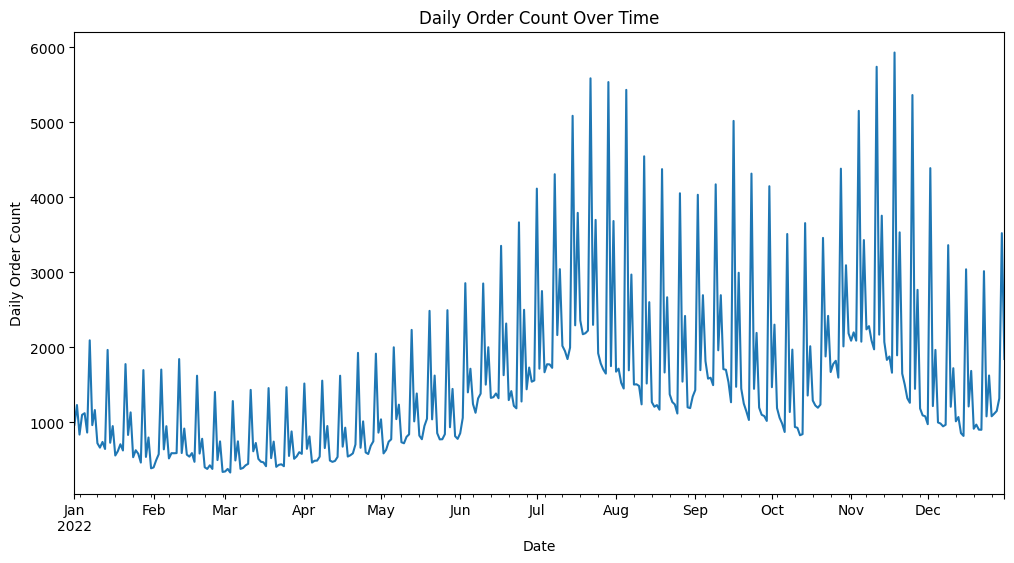

In [410]:
df_2.loc[:, 'event_time'] = pd.to_datetime(df_2['event_time'])
plt.figure(figsize=(12, 6))
df_2.set_index('event_time').resample('D')['order_id'].count().plot()

plt.title('Daily Order Count Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Order Count')
plt.show()

Number of errors by hour of the day:


,hour_of_day,error_count
0,0,11152
1,1,12283
2,2,13680
3,3,14859
4,4,14902
5,5,14751
6,6,14130
7,7,12625
8,8,11495
9,9,11283


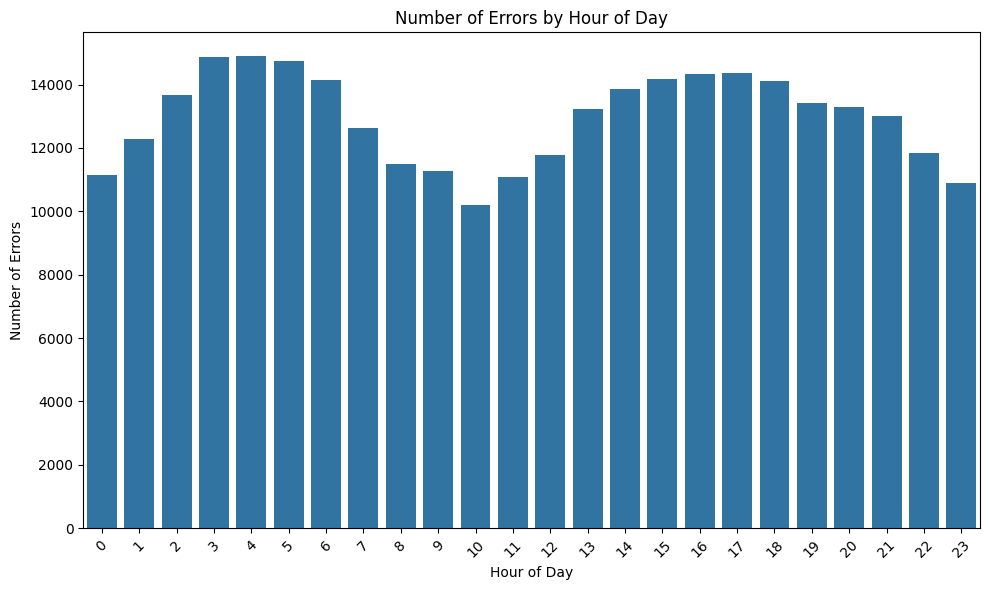

In [411]:
df_2.loc[:, 'event_time'] = pd.to_datetime(df_2['event_time'], errors='coerce')

# Filter for transactions with errors
errors_df = df_2[df_2['error_type'].notna()].copy()

# Explicitly convert 'event_time' column in errors_df to datetime, without .loc
errors_df['event_time'] = pd.to_datetime(errors_df['event_time'], errors='coerce')

# Extract hour of day into a new column, without .loc
errors_df['hour_of_day'] = errors_df['event_time'].dt.hour

# Now perform the groupby operation using the new 'hour_of_day' column
errors_by_hour = errors_df.groupby('hour_of_day').size().reset_index(name='error_count')

print("Number of errors by hour of the day:")
display(errors_by_hour)

plt.figure(figsize=(10, 6))
sns.barplot(x='hour_of_day', y='error_count', data=errors_by_hour)
plt.title('Number of Errors by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Errors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [412]:
errors_by_country = (
    df_2[df_2['transaction_status'] == 'fail']
    .groupby('card_country')['order_id']
    .count()
    .reset_index(name='fail_count')
)

errors_by_country['fail_percent'] = (
    errors_by_country['fail_count'] / errors_by_country['fail_count'].sum() * 100
)

errors_by_country.sort_values('fail_count', ascending=False).head(10)

,card_country,fail_count,fail_percent
178,USA,137533,44.13
80,IND,18801,6.03
32,CAN,18079,5.80
9,AUS,16221,5.20
112,MEX,12377,3.97
63,GBR,7055,2.26
131,NZL,4955,1.59
6,ARG,4701,1.51
26,BRA,4601,1.48
144,ROU,4210,1.35


### Errors by Bank name

In [413]:
top_error_type_by_bank = (
    df_2[df_2['transaction_status'] == 'fail']
    .groupby(['bank_name', 'error_type'])['order_id']
    .count()
    .reset_index()
)
top_error_type_by_bank = (
    top_error_type_by_bank
    .sort_values(['bank_name', 'order_id'], ascending=[True, False])
    .groupby('bank_name')
    .head(1)[['bank_name', 'error_type']]
    .rename(columns={'error_type': 'top_error_type'})
)

# Drop any existing 'top_error_type' related columns to avoid conflicts
errors_by_bank = errors_by_bank.drop(columns=[col for col in errors_by_bank.columns if 'top_error_type' in col], errors='ignore')

errors_by_bank = errors_by_bank.merge(top_error_type_by_bank, on='bank_name', how='left')
errors_by_bank

,bank_name,fail_count,fail_percent,avg_fail_price,top_error_type
0,SUTTON BANK,24891,7.99,20.66,3.10
1,THE BANCORP BANK,10620,3.41,25.48,3.02
2,"STRIDE BANK, NATIONAL ASSOCIATION",7172,2.30,25.11,3.02
3,COMMONWEALTH BANK OF AUSTRALIA,5804,1.86,29.41,3.02
4,"BANK OF AMERICA, NATIONAL ASSOCIATION",5617,1.80,35.42,3.02
5,"WELLS FARGO BANK, NATIONAL ASSOCIATION",5304,1.70,32.40,3.02
6,JPMORGAN CHASE BANK N.A. - DEBIT,4787,1.54,33.59,3.01
7,METABANK,4260,1.37,22.83,3.02
8,BBVA BANCOMER S.A.,3978,1.28,25.49,3.02
9,THE TORONTO-DOMINION BANK,3951,1.27,29.84,3.10


The most failed from SUTTON BANK

In [420]:
df_2 = df_2.copy()

df_2['event_time'] = pd.to_datetime(
    df_2['event_time'].astype(str),
    errors='coerce'
)

print(df_2['event_time'].dtype)  # MUST be datetime64[ns]

df_2['event_month'] = df_2['event_time'].dt.to_period('M')

sutton = df_2[df_2['bank_name'] == 'SUTTON BANK']

sutton_monthly = (
    sutton.groupby(['event_month', 'transaction_status'])['order_id']
    .count()
    .reset_index(name='count')
)

sutton_monthly


datetime64[ns]


,event_month,transaction_status,count
0,2022-01,fail,812
1,2022-01,success,16
2,2022-02,fail,428
3,2022-02,success,9
4,2022-03,fail,582
5,2022-03,success,17
6,2022-04,fail,960
7,2022-04,success,40
8,2022-05,fail,1228
9,2022-05,success,46


Top Error Types for SUTTON BANK

In [422]:
# Filter all transactions made with cards issued by SUTTON BANK
sutton = df_2[df_2['bank_name'] == 'SUTTON BANK']
sutton_errors = sutton['error_type'].value_counts()
sutton_errors

,count
error_type,
3.10,8754
3.02,6914
2.08,3151
4.09,2719
3.04,1120
3.01,423
3.08,419
0.01,418
4.02,286


### Cohort Analysis

In [423]:
# Make sure df_2 is an independent copy (not a view)
df_2 = df_2.copy()

# Ensure event_time is datetime
df_2.loc[:, 'event_time'] = pd.to_datetime(df_2['event_time'])

# Step 1: Cohort month (first transaction month for each user)
df_2.loc[:, 'cohort_month'] = (
    df_2.groupby('user_id')['event_time']
        .transform('min')
        .dt.to_period('M')
)

# Step 2: Event month (month of each transaction)
df_2.loc[:, 'event_month'] = df_2['event_time'].dt.to_period('M')

# Step 3: Cohort index (months since first transaction)
df_2.loc[:, 'cohort_index'] = (
    (df_2['event_month'].dt.year - df_2['cohort_month'].dt.year) * 12 +
    (df_2['event_month'].dt.month - df_2['cohort_month'].dt.month)
)

# Step 4: Build cohort table (unique users per cohort & month offset)
cohort_table = (
    df_2
    .groupby(['cohort_month', 'cohort_index'])['user_id']
    .nunique()
    .reset_index()
)

# Step 5: Pivot into cohort matrix
cohort_matrix = cohort_table.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='user_id'
)

# Step 6: Retention %
cohort_retention = cohort_matrix.divide(cohort_matrix.iloc[:, 0], axis=0) * 100
cohort_retention.round(1)

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2022-01,100.00,56.90,41.70,33.80,26.90,23.00,21.70,17.90,15.20,13.00,11.30,9.90
2022-02,100.00,34.50,13.30,9.00,6.10,4.50,14.00,6.90,2.60,2.60,1.70,NaN
2022-03,100.00,42.10,11.90,7.70,4.70,4.60,8.60,4.90,2.40,1.90,NaN,NaN
2022-04,100.00,36.90,16.40,10.20,6.80,5.60,7.10,4.70,2.80,NaN,NaN,NaN
2022-05,100.00,36.60,17.20,9.70,7.20,5.10,5.20,3.70,NaN,NaN,NaN,NaN
2022-06,100.00,39.20,14.90,9.10,5.10,3.50,3.00,NaN,NaN,NaN,NaN,NaN
2022-07,100.00,35.40,15.70,8.40,5.10,3.90,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,100.00,35.90,14.90,8.60,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,100.00,27.20,11.20,6.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


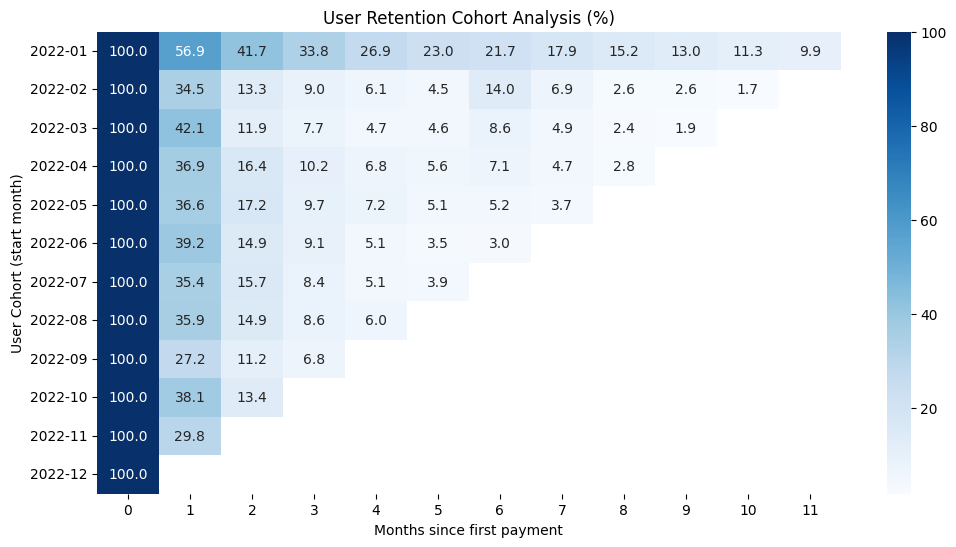

In [424]:
plt.figure(figsize=(12,6))
sns.heatmap(cohort_retention, annot=True, fmt=".1f", cmap="Blues")
plt.title("User Retention Cohort Analysis (%)")
plt.ylabel("User Cohort (start month)")
plt.xlabel("Months since first payment")
plt.show()

In [425]:
df_2.loc[:, 'event_month'] = df_2['event_time'].dt.to_period('M')
monthly_stats = (
    df_2.groupby(['event_month', 'transaction_status'])['order_id']
    .count()
    .unstack(fill_value=0)
)
monthly_stats['fail_more_than_success'] = monthly_stats['fail'] > monthly_stats['success']
monthly_stats

transaction_status,fail,success,fail_more_than_success
event_month,,,
2022-01,12499,16104,False
2022-02,8500,11608,False
2022-03,8652,10743,False
2022-04,12151,12550,False
2022-05,18077,16151,True
2022-06,27382,23415,True
2022-07,48198,34372,True
2022-08,33631,27557,True
2022-09,37498,24741,True


In [426]:
#df_2.to_csv('clean_data.csv', index=False)

In [427]:
#from google.colab import files
#files.download('clean_data.csv')
